Submitted as part of coursework for GEOG5303M: Creative Coding for Real World Problems

In [1]:
pip install folium matplotlib geopandas pysal mapclassify

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━

In [2]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from pysal.viz import mapclassify

In [3]:
#Load Public Pathways shape file
path = gpd.read_file('Def_Paths.shp')
path.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    2425 non-null   int64         
 1   MAP         2425 non-null   int32         
 2   LOCAL_AREA  2425 non-null   int32         
 3   PROW_ID     2424 non-null   object        
 4   CREATE_DAT  2425 non-null   datetime64[ms]
 5   LAST_MOD_D  2425 non-null   datetime64[ms]
 6   PROW_STATU  2425 non-null   object        
 7   USRN        2425 non-null   int64         
 8   SURFACE     2423 non-null   object        
 9   LENGTH_MET  2425 non-null   float64       
 10  LENGTH_MIL  2425 non-null   float64       
 11  WIDTH_METR  2425 non-null   float64       
 12  WIDTH_FEET  2425 non-null   float64       
 13  GENERAL     1119 non-null   object        
 14  LCC_AREA_C  2424 non-null   object        
 15  LOCAL_AR_1  2424 non-null   object        
 16  COMMENT_NE  2412

<Axes: >

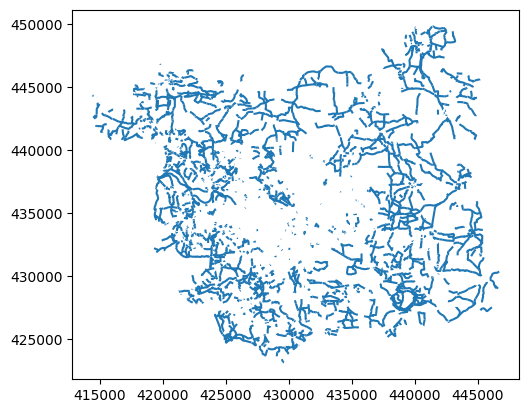

In [4]:
path.plot()

In [5]:
#Load Green Space shape file
green = gpd.read_file('SE_GreenspaceSite.shp')
green.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         9492 non-null   object  
 1   function   9492 non-null   object  
 2   distName1  2591 non-null   object  
 3   distName2  23 non-null     object  
 4   distName3  0 non-null      object  
 5   distName4  0 non-null      object  
 6   geometry   9492 non-null   geometry
dtypes: geometry(1), object(6)
memory usage: 519.2+ KB


<Axes: >

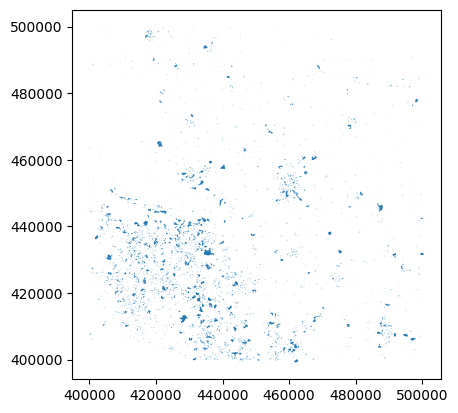

In [6]:
green.plot()

<Axes: >

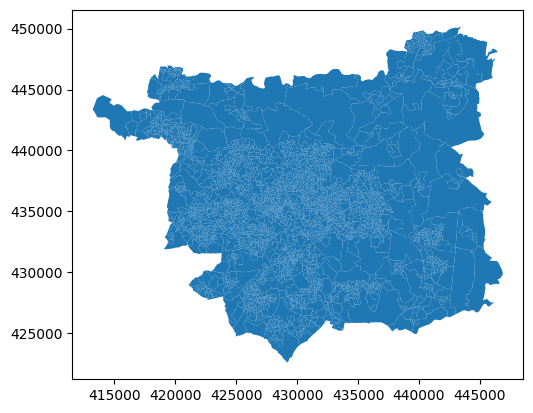

In [7]:
#Load Leeds OA shape file
LeedsOA= gpd.read_file('LeedsOA.shp')
LeedsOA.plot()

In [8]:
#Check CRS of files
print(path.crs)
print(green.crs)
print(LeedsOA.crs)

EPSG:27700
EPSG:27700
EPSG:27700


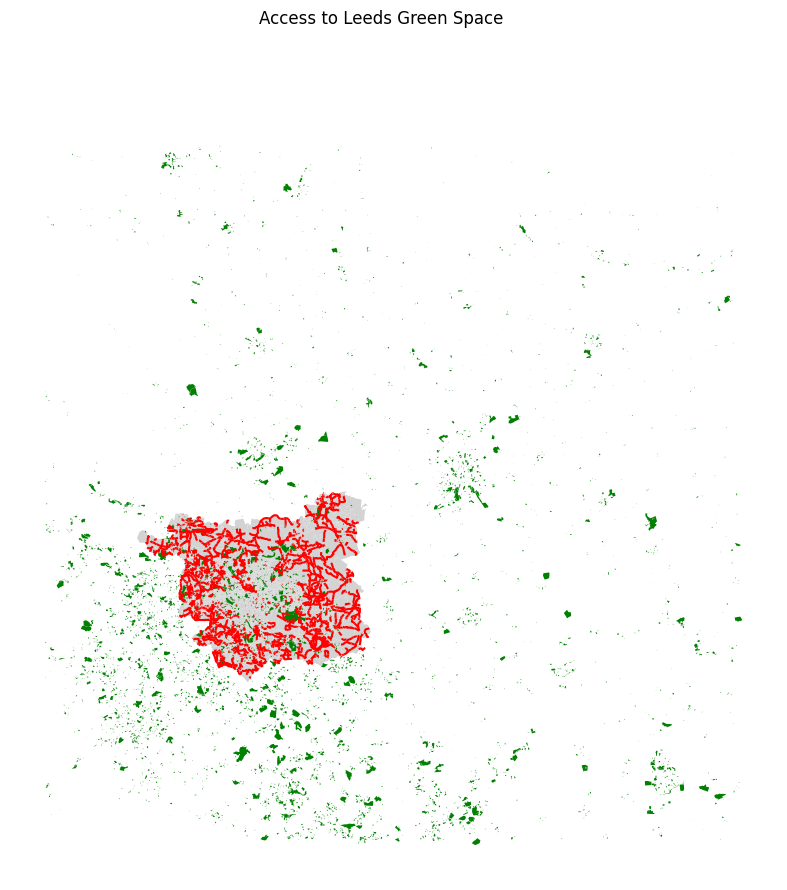

In [9]:
#Plot Green Spaces and Pathways in Leeds
def Figure1():
  fig, ax = plt.subplots(1,1, figsize=(10,10), ) #set figure size
  LeedsOA.plot(ax = ax, facecolor = 'lightgray') #plot Leeds map
  green.plot(ax = ax, color = 'green') #plot green spaces
  path.plot(ax = ax, color = 'red') #plot pathways
  ax.set_axis_off() #remove axes
  fig.suptitle('Access to Leeds Green Space') #add a title
  plt.show()

Figure1()

In [10]:
#Green spaces go outside of Leeds boundaries to keep the ones just in Leeds
#Clip the Green Spaces to the Leeds outline
LeedsOA['outline'] = 1
LeedsOA_outline = LeedsOA.dissolve(by = 'outline')

In [11]:
Green_clip = gpd.clip(green, LeedsOA_outline)

<Axes: >

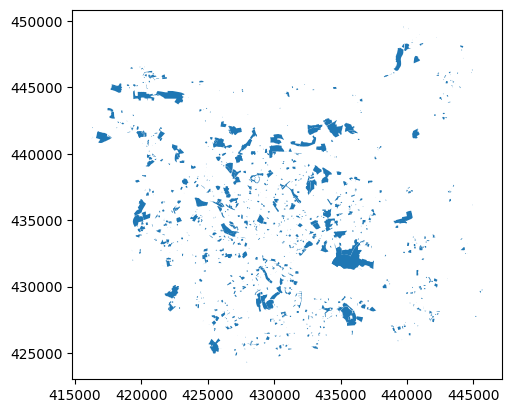

In [12]:
Green_clip.plot()

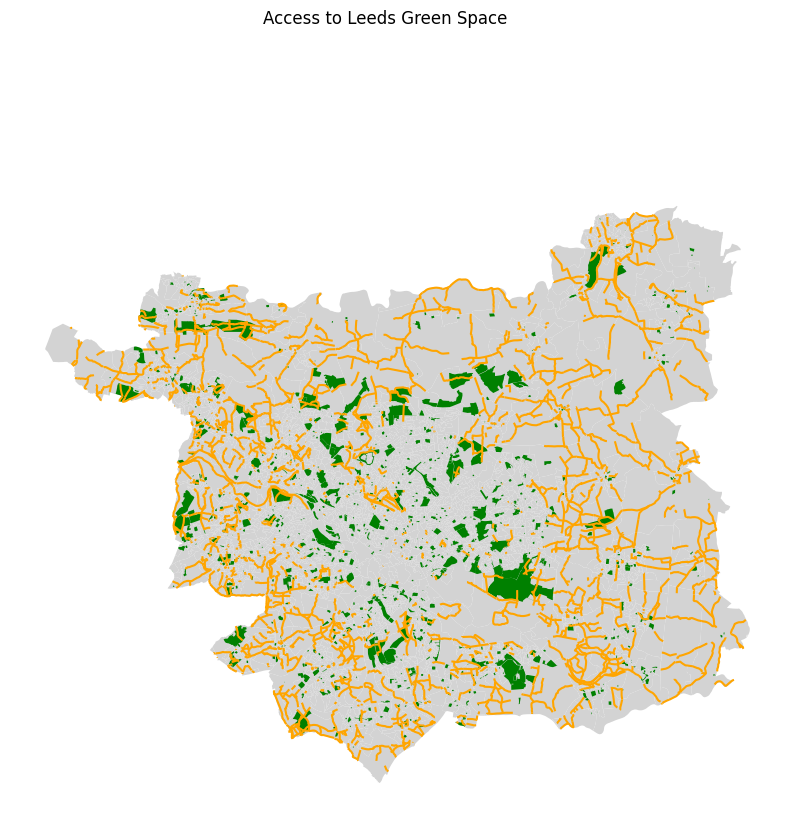

In [13]:
#Plot Green Spaces and Pathways in Leeds
def Figure2():
  fig, ax = plt.subplots(1,1, figsize=(10,10), ) #set the figure size
  LeedsOA.plot(ax = ax, facecolor = 'lightgray') #plot Leeds map
  Green_clip.plot(ax = ax, color = 'green') #plot green spaces
  path.plot(ax = ax, color = 'orange') #plot pathways
  ax.set_axis_off() #remove axes
  fig.suptitle('Access to Leeds Green Space') #add a title
  plt.show()

Figure2()

In [14]:
green.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,1E27512F-D9D8-3552-E063-AAEFA00A7A80,Public Park Or Garden,None,None,None,None,"POLYGON Z ((496841.22 491055.16 0, 496852.33 4..."
1,1E275139-1105-3552-E063-AAEFA00A7A80,Religious Grounds,St Peter's Church,None,None,None,"POLYGON Z ((496892.52 490579.71 0, 496928.02 4..."
2,1E275139-22E9-3552-E063-AAEFA00A7A80,Religious Grounds,St Matthew's Church,None,None,None,"POLYGON Z ((497463.02 484035.3 0, 497466.43 48..."
3,1E275139-2304-3552-E063-AAEFA00A7A80,Play Space,None,None,None,None,"POLYGON Z ((498430.39 484237.49 0, 498439.47 4..."
4,1E275225-791F-3552-E063-AAEFA00A7A80,Play Space,None,None,None,None,"POLYGON Z ((498629.48 484019.54 0, 498633.1 48..."


## Network Analysis of Paths

In [15]:
#ReLoad Data with new names
green_spaces = gpd.read_file("SE_GreenspaceSite.shp")
pathways = gpd.read_file("Def_Paths.shp")
LeedsOA= gpd.read_file('LeedsOA.shp')

In [16]:
#Clip the Green Spaces to the Leeds outline (avoids having green spaces outside of Leeds boundaries)
LeedsOA['outline'] = 1
LeedsOA_outline = LeedsOA.dissolve(by = 'outline')
green_spaces = gpd.clip(green_spaces, LeedsOA_outline)

In [17]:
#Create buffers of 100m around green spaces -> pathways could be on limit of green spaces boundaries
green_spaces_buffer = green_spaces.buffer(100)
#Convert buffer (GeoSeries) to GeoDataFrame
green_spaces_buffer_gdf = gpd.GeoDataFrame(green_spaces_buffer, columns=['geometry'])

In [18]:
#Spatially join buffered pathways and green spaces into a single dataset
connected_pathways = gpd.sjoin(pathways, green_spaces_buffer_gdf, how="inner", predicate='intersects')
connected_pathways.head()

,OBJECTID,MAP,LOCAL_AREA,PROW_ID,CREATE_DAT,LAST_MOD_D,PROW_STATU,USRN,SURFACE,LENGTH_MET,...,DESCRIPTIO,PATHNAME,GENERIC_SU,LEN,COMMENTS,WEB_LINK,LCC_LINK,SHAPE_LEN,geometry,index_right
4,1046,1,19,50,2003-07-23,2008-06-30,FP,0,Concrete Slabs,111.0,...,"Footpath from a point, SE 2353 3890, at the jc...",Definitive Footpath HORSFORTH 50,0,0.0,None,http://www.leeds.gov.uk/leisure/Pages/Definiti...,/leisure/Pages/Definitive-Map-and-Statement.aspx,110.796575,"LINESTRING (423648.566 438409.034, 423649.265 ...",2388
9,1279,1,16,17,2003-06-26,2007-08-03,FP,0,Ashed,483.0,...,Footpath known as Micklefield commencing at Bl...,Definitive Footpath GARFORTH 17,6,0.0,None,http://www.leeds.gov.uk/leisure/Pages/Definiti...,/leisure/Pages/Definitive-Map-and-Statement.aspx,491.083353,"LINESTRING (441480.737 433081.83, 441500.684 4...",5146
10,977,1,2,83,2003-06-26,2007-07-06,FP,0,Grass,853.0,...,Footpath commencing at Bayton Lane Yeadon and ...,Definitive Footpath AIREBOROUGH 83,4,0.0,None,http://www.leeds.gov.uk/leisure/Pages/Definiti...,/leisure/Pages/Definitive-Map-and-Statement.aspx,852.595059,"LINESTRING (422304.1 440460.636, 422113.967 44...",2375
11,1114,1,116,258,2003-07-23,2008-06-30,FP,0,Metalled,114.0,...,"Footpath commencing from a point, SE 2487 3114...",Definitive Footpath LEEDS 258,0,0.0,None,http://www.leeds.gov.uk/leisure/Pages/Definiti...,/leisure/Pages/Definitive-Map-and-Statement.aspx,114.096362,"LINESTRING (424851.088 431253.614, 424859.109 ...",4467
11,1114,1,116,258,2003-07-23,2008-06-30,FP,0,Metalled,114.0,...,"Footpath commencing from a point, SE 2487 3114...",Definitive Footpath LEEDS 258,0,0.0,None,http://www.leeds.gov.uk/leisure/Pages/Definiti...,/leisure/Pages/Definitive-Map-and-Statement.aspx,114.096362,"LINESTRING (424851.088 431253.614, 424859.109 ...",4465


<Axes: >

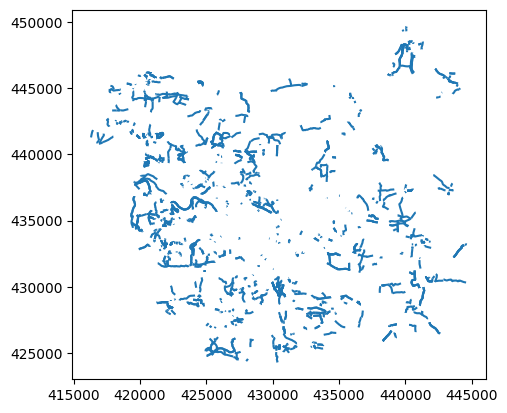

In [19]:
connected_pathways.plot()

In [20]:
#Want to create a map showing how green spaces are connected to each other through pathways
#To do so have to create graph, where the nodes are the ends of pathways connecting green spaces to each other

#Load packages
#LineString = single line
#MultiLineString = group of multiple LineString objects, representing several connected lines which form a path
from shapely.geometry import Point, LineString, MultiLineString
import networkx as nx

#Create empty network graph
G = nx.Graph()

#Iterate through the rows of the connected_pathways
for _, row in connected_pathways.iterrows():
    geometry = row.geometry

    #Check if geometry is LineString or MultiLineString
    if isinstance(geometry, LineString):
        #If is LineString, get start and end coordinates of line/pathway
        start = geometry.coords[0]  #Start point
        end = geometry.coords[-1]   #End point
    elif isinstance(geometry, MultiLineString):
        #If is MultiLineString, iterate over the individual LineStrings using .geoms
        #to get the start and end coordinates of the pathway as a whole
        for line in geometry.geoms:
            start = line.coords[0]  #Start of first LineString in the MultiLineString
            end = line.coords[-1]   #End of last LineString in the MultiLineString
            break
    else:
        #If other type of geometry, skip and continue
        continue

    #Add the edge to the graph (using start and end points as nodes) to represent the pathways connecting the nodes, and store geometry of the edge
    G.add_edge(start, end, geometry=geometry, weight=geometry.length)

<ipython-input-21-01ee2b9df40f>:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


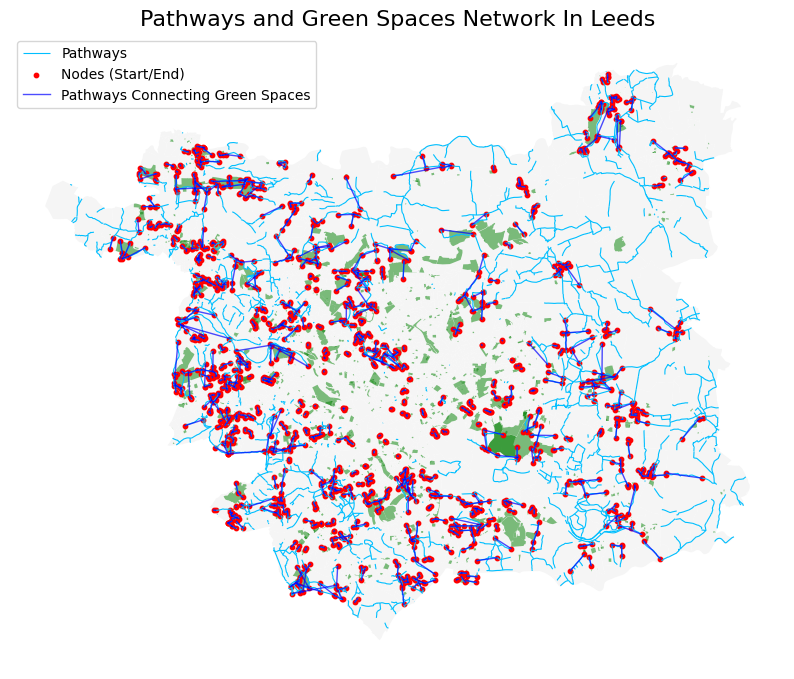

In [21]:
#Create map network map

fig, ax = plt.subplots(figsize=(10, 10)) #plot figure
LeedsOA.plot(ax=ax, color= 'whitesmoke') #plot Leeds boundaries
green_spaces.plot(ax=ax, color='green', alpha=0.5, label='Green Spaces') #plot green spaces
pathways.plot(ax=ax, color='deepskyblue', linewidth=0.8, label='Pathways') #plot pathways

#Plot nodes (start and end points of connected pathways)
#Extract node coordinates (start and end points of edges in the graph)
nodes = list(G.nodes)

#Create GeoDataFrame for the nodes
node_coords = [Point(node) for node in nodes]
node_gdf = gpd.GeoDataFrame(geometry=node_coords, crs=green_spaces_buffer.crs)

#Plot nodes
node_gdf.plot(ax=ax, color='red', markersize=10, label='Nodes (Start/End)')

#Plot edges (= pathways in the graph)
for edge in G.edges:
    #Get start and end points of each edge
    start, end = edge
    #Create LineString between the start and end points, to make straight lines
    line = LineString([start, end])

    #Plot each edge (line) on the map, with a label only for the first edge to avoid duplicates in the legend
    x, y = line.xy
    ax.plot(x, y, color='blue', linewidth=1, alpha=0.7, label='Pathways Connecting Green Spaces' if edge == list(G.edges)[0] else "")


#Add legends
ax.set_title("Pathways and Green Spaces Network In Leeds", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
ax.set_axis_off() #remove the axes

#Show plot
plt.show()

## Identifying potential Green Corridors

In [22]:
#Create new column indicating how many green spaces a green space is connected to through pathways

green_spaces_buffer_gdf['num_connected_parks'] = 0

#Iterate through the edges (pathways connecting parks) in graph G
for start, end, data in G.edges(data=True):
    #Get geometry of the edge
    edge_geometry = data['geometry']

    #Check if edge intersects with both parks (start and end parks)
    #Extract geometries of the parks nodes connected by edge
    start_park = green_spaces_buffer_gdf[green_spaces_buffer_gdf.geometry.intersects(Point(start))]
    end_park = green_spaces_buffer_gdf[green_spaces_buffer_gdf.geometry.intersects(Point(end))]

    #If both parks are found, add to their n° of parks connection count
    if not start_park.empty:
        green_spaces_buffer_gdf.at[start_park.index[0], 'num_connected_parks'] += 1
    if not end_park.empty:
        green_spaces_buffer_gdf.at[end_park.index[0], 'num_connected_parks'] += 1

#Check
green_spaces_buffer_gdf.head()

,geometry,num_connected_parks
4894,"POLYGON ((445035.211 427789.799, 445035.769 42...",0
4896,"POLYGON ((445381.623 429676.624, 445382.673 42...",0
4897,"POLYGON ((445681.523 429827.963, 445691.557 42...",0
5622,"POLYGON ((432889.777 425591.255, 432931.471 42...",6
5630,"POLYGON ((433301.791 425754.041, 433311.337 42...",2


In [23]:
green_spaces_buffer_gdf['num_connected_parks'].describe()

,num_connected_parks
count,1418.000000
mean,1.068406
std,2.989084
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,66.000000


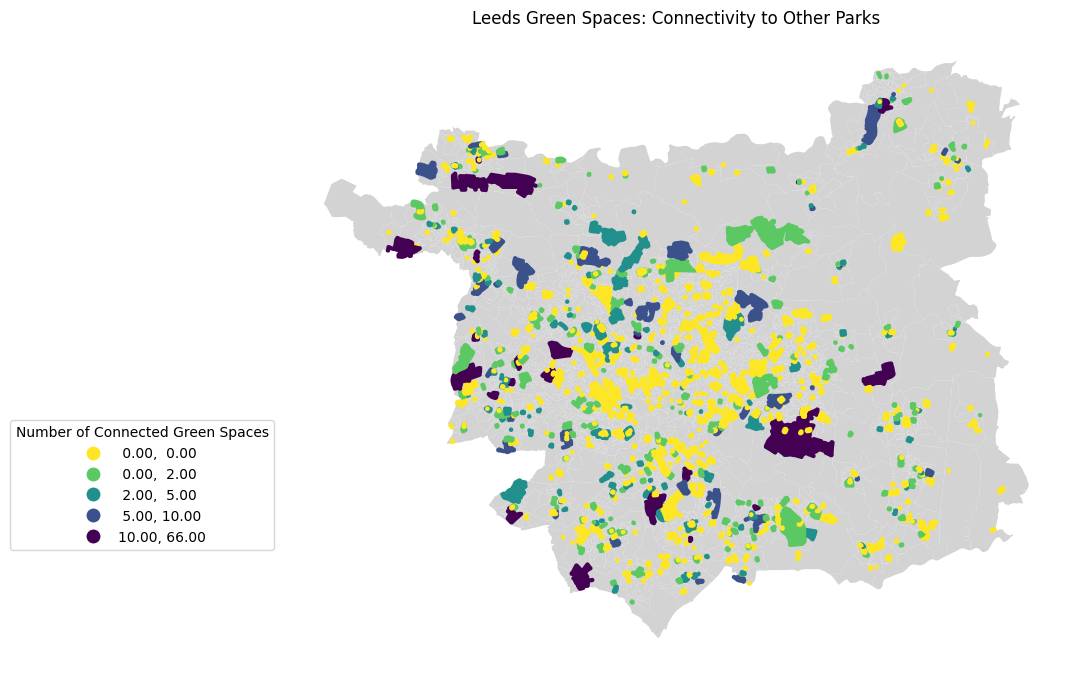

In [24]:
#Plot the results, to identify parks with no connections to other parks
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax=ax, color='lightgray') #plot Leeds boundaries
#Plot green spaces, with colors based on number of connected parks
green_spaces_buffer_gdf.plot(ax=ax, column='num_connected_parks', scheme='User_Defined', classification_kwds=dict(bins=[0, 2, 5, 10,66]),
                      k = 7,legend = True, cmap ='viridis_r')

# Add title and legend
ax.set_title('Leeds Green Spaces: Connectivity to Other Parks')
leg = ax.get_legend()
leg.set_title("Number of Connected Green Spaces")
leg.set_bbox_to_anchor((-0.01, 0.4))

ax.set_axis_off()
plt.show()

In [25]:
#Get value counts to calculate percentage of parks that have 0 pathway connections to other parks
green_spaces_buffer_gdf['num_connected_parks'].value_counts()

,count
num_connected_parks,
0,986
1,152
2,87
3,53
4,44
5,29
6,16
8,12
7,11
